In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib as mpl

font_path = os.path.join('Fonts', 'Formula1_font.ttf')
font_manager.fontManager.addfont(font_path)
f1_font = font_manager.FontProperties(fname=font_path)

In [53]:
seasonCalendar = pd.read_csv('Formula1_2023season_calendar.csv')
seasonCalendar.set_index('Round', inplace=True)
seasonDrivers = pd.read_csv('Formula1_2023season_drivers.csv')
seasonDrivers.set_index('No', inplace=True)
seasonTeams = pd.read_csv('Formula1_2023season_teams.csv')
seasonTeams.set_index('Team', inplace=True)
sprintQualifyingResults = pd.read_csv('Formula1_2023season_sprintShootoutResults.csv')
sprintQualifyingResults.set_index('Track', inplace=True)
raceResults = pd.read_csv('formula1_2021season_raceResults.csv')
driverOfTheDay = pd.read_csv('Formula1_2023season_driverOfTheDayVotes.csv')
driverOfTheDay.set_index('Track', inplace=True)

In [54]:
# Assign Team colors
def assign_color_teams(teams):
    color_map={
        'Mercedes': '#00C8AA',   
        'Haas Ferrari': '#FFFFFF',
        'Haas F1 Team': '#FFFFFF',    
        'Aston Martin Aramco Mercedes': '#006F62',
        'Aston Martin': '#006F62',    
        'Williams Mercedes': '#005AFF',   
        'Williams': '#005AFF',   
        'Racing Bulls Honda RBPT': '#6692D1', 
        'AlphaTauri': '#6692D1', 
        'McLaren Mercedes': '#FF8205',   
        'McLaren': '#FF8205',   
        'Red Bull Racing Honda RBPT': '#0600F0',  
        'Red Bull Racing': '#0600F0',    
        'Ferrari': '#FF0000',   
        'Alfa Romeo Ferrari': '#C60000',
        'Alfa Romeo': '#C60000',
        'Alpine Renault': '#FF87BB',  
        'Alpine': '#FF87BB',  
    }
    return[color_map.get(team, '#888888') for team in teams]

# Assign Driver colors
def assign_color_drivers(drivers):
    color_map = {
        'Valtteri Bottas': '#C60000',
        'Guanyu Zhou': '#C60000',
        'Nico Hulkenberg': '#FFFFFF',
        'Kevin Magnussen': '#FFFFFF',
        'Fernando Alonso': '#006F62',
        'Lance Stroll': '#006F62',
        'Lando Norris': '#FF8205',
        'Oscar Piastri': '#FF8205',
        'Max Verstappen': '#0600F0',
        'Sergio Perez': '#0600F0',
        'Charles Leclerc': '#FF0000',
        'Carlos Sainz': '#FF0000',
        'Lewis Hamilton': '#00C8AA',
        'George Russell': '#00C8AA',
        'Esteban Ocon': '#FF87BB',
        'Pierre Gasly': '#FF87BB',
        'Jack Doohan': '#FF87BB',
        'Alex Albon': '#005AFF',
        'Logan Sargeant': '#005AFF',
        'Jamie Chadwick': '#005AFF',
        'Nyck De Vries': '#6692D1',
        'Yuki Tsunoda': '#6692D1',
        'Daniel Ricciardo': '#6692D1',
        'Liam Lawson': '#6692D1',
    }
    return [color_map.get(name, '#888888') for name in drivers]


# Set the dark theme for F1
def set_f1_dark_theme():
    mpl.rcParams.update({
        'figure.facecolor': '#15151E',
        'axes.facecolor': '#15151E',
        'axes.edgecolor': '#FFFFFF',
        'axes.labelcolor': '#FFFFFF',
        'axes.titleweight': 'bold',
        'axes.titlesize': 20,
        'axes.labelsize': 14,
        'xtick.color': '#CCCCCC',
        'ytick.color': '#CCCCCC',
        'axes.labelpad': 22,
        'grid.color': '#444444',
        'grid.alpha': 0.3,
        'legend.facecolor': '#222222',
        'legend.edgecolor': '#444444',
        'text.color': '#FFFFFF',
        'font.family': f1_font.get_name(),
        'figure.autolayout': True,
        'savefig.facecolor': '#121212',
    })

set_f1_dark_theme()

In [55]:
seasonCalendar.loc[6, 'Race Date'] = 'Cancelled'
seasonCalendar

,Race Date,GP Name,Country,City,Circuit Name,First GP,Number of Laps,Circuit Length(km),Race Distance(km),Lap Record,Record Owner,Record Year,Turns,DRS Zones
Round,,,,,,,,,,,,,,
1,05/03/2023,Gulf Air Bahrain GP,Bahrain,Sakhir,Bahrain International Circuit,2004,57,5.412,308.238,1:31.447,Pedro de la Rosa,2005,15,3
2,19/03/2023,STC Saudi Arabian GP,Saudi Arabia,Jeddah,Jeddah Corniche Circuit,2021,50,6.174,308.450,1:30.734,Lewis Hamilton,2021,27,3
3,02/04/2023,Rolex Australian GP,Australia,Melbourne,Melbourne Grand Prix Circuit,1996,58,5.278,306.124,1:20.235,Sergio Perez,2023,14,4
4,30/04/2023,Azerbaijan GP,Azerbaijan,Baku,Baku City Circuit,2016,51,6.003,306.049,1:43.009,Charles Leclerc,2019,20,2
5,07/05/2023,Crypto.com Miami GP,United States,Miami,Miami International Autodrome,2022,57,5.412,308.326,1:29.708,Max Verstappen,2023,19,3
6,Cancelled,Qatar Airways Gran Premio Del Made In Italy e ...,Italy,Imola,Autodromo Enzo e Dino Ferrari,1980,63,4.909,309.049,1:15.484,Lewis Hamilton,2020,19,1
7,28/05/2023,Grand Prix de Monaco,Monaco,Monaco,Circuit de Monaco,1950,78,3.337,260.286,1:12.909,Lewis Hamilton,2021,19,1
8,04/06/2023,AWS Gran Premio de España,Spain,Catalunya,Circuit de Barcelona-Catalunya,1991,66,4.657,307.236,1:16.330,Max Verstappen,2023,14,2
9,18/06/2023,Pirelli Grand Prix du Canada,Canada,Montréal,Circuit Gilles-Villeneuve,1978,70,4.361,305.270,1:13.078,Valtteri Bottas,2018,14,3


In [56]:
# ----- 2023 Season Drivers -----
def join_driver_info(seasonDrivers):
    if 'Driver' in seasonDrivers.columns and 'Abbreviation' in seasonDrivers.columns:
        seasonDrivers['DriverInfo'] = seasonDrivers['Driver'].astype(str).str.strip() + ' - ' + seasonDrivers['Abbreviation'].astype(str).str.strip()
    else:
        print("Driver and/or Abbreviation Missing")
    return seasonDrivers
join_driver_info(seasonDrivers)
info = ['DriverInfo', 'Team', 'Country', 'Podiums', 'Points', 'Grands Prix Entered', 'World Championships', 'Highest Race Finish', 'Highest Grid Position']
seasonDrivers[info].head(24)


,DriverInfo,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position
No,,,,,,,,,
1,Max Verstappen - VER,Red Bull Racing,Netherlands,98,2586.5,185,3,1(x54),1
11,Sergio Perez - PER,Red Bull Racing,Mexico,35,1486.0,258,0,1(x6),1
44,Lewis Hamilton - HAM,Mercedes,United Kingdom,197,4639.5,332,7,1(x103),1
14,Fernando Alonso - ALO,Aston Martin,Spain,106,2267.0,380,2,1(x32),1
16,Charles Leclerc - LEC,Ferrari,Monaco,30,1074.0,125,0,1(x5),1
4,Lando Norris - NOR,McLaren,United Kingdom,13,633.0,104,0,2(x7),1
55,Carlos Sainz - SAI,Ferrari,Sapin,18,982.5,185,0,1(x2),1
63,George Russell - RUS,Mercedes,United Kingdom,11,469.0,104,0,1(x1),1
81,Oscar Piastri - PIA,McLaren,Australia,2,97.0,22,0,2(x1),2


In [57]:
# ----- 2023 Season Teams -----
seasonTeams

,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
Team,,,,,,,,,,,
Red Bull Racing,Oracle Red Bull Racing,"Milton Keynes, United Kingdom",Christain Horner,Pierre Waché,RB19,Honda RBPT,1997,6,1(x113),95,95
Mercedes,Mercedes-AMG Petronas F1 Team,"Brackley, United Kingdom",Toto Wolff,James Allison,W14,Mercedes,1970,8,1(x116),129,96
Ferrari,Scuderia Ferrari,"Maranello, Italy",Frédéric Vasseur,Enrico Cardile / Enrico Gualtieri,SF-23,Ferrari,1950,16,1(x244),249,259
McLaren,McLaren Formula 1 Team,"Woking, United Kingdom",Andrea Stella,Peter Prodromou / Neil Houldey,MCL60,Mercedes,1966,8,1(x183),156,165
Aston Martin,Aston Martin Aramco Cognizant F1 Team,"Silverstone, United Kingdom",Mike Krack,Dan Fallows,AMR23,Mercedes,2018,0,1(x1),1,1
Alpine,BWT Alpine F1 Team,"Enstone, United Kingdom",Bruno Famin,Matt Harman,A523,Renault,1986,2,1(x21),20,15
Williams,Williams Racing,"Grove, United Kingdom",James Vowles,Pat Fry,FW45,Mercedes,1978,9,1(x114),128,133
AlphaTauri,Scuderia AlphaTauri,"Faenza, Italy",Franz Tost,Jody Egginton,AT04,Honda RBPT,1985,0,1(x2),1,3
Alfa Romeo,Alfa Romeo F1 Team Stake,"Hinwil, Switzerland",Alessandro Alunni Bravi,James Key,C43,Ferrari,1993,0,1(x1),1,7


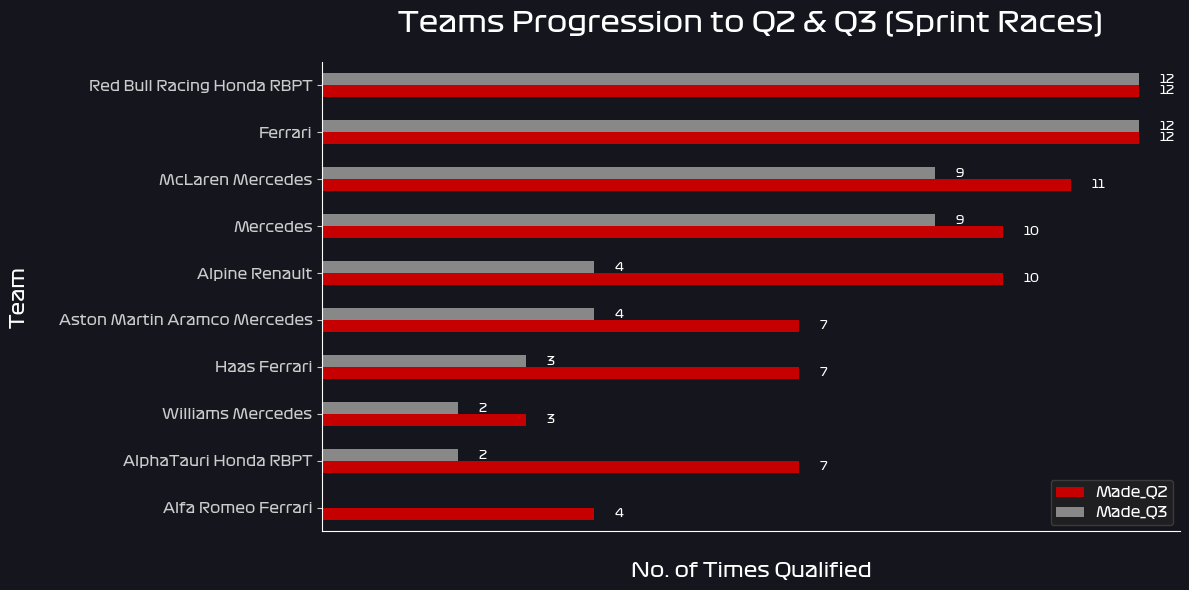

In [58]:
# ----- Sprint Qualifying Results Data Visualization -----

for col in ['SQ1', 'SQ2', 'SQ3']:
    sprintQualifyingResults[col] = sprintQualifyingResults[col].astype(str).str.strip().replace({
        'DNQ': np.nan, 'DNF': np.nan, 'DNS': np.nan, 'nan': np.nan, 'Missing value': np.nan})

sprintQualifyingResults_numeric = sprintQualifyingResults.copy()

sprintQualifyingResults_numeric['Made_Q2'] = sprintQualifyingResults_numeric['SQ2'].notna()
sprintQualifyingResults_numeric['Made_Q3'] = sprintQualifyingResults_numeric['SQ3'].notna()

sprintQualifyingResults_numeric

team_progress = sprintQualifyingResults_numeric.groupby('Team')[['Made_Q2', 'Made_Q3']].sum()
team_progress_sorted = team_progress.sort_values(by='Made_Q3', ascending=True)
team_colors = assign_color_teams(team_progress_sorted.index.tolist())

team_progress_sorted.plot(
    kind='barh',
    figsize=(12,6),
    color=team_colors
)
plt.title('Teams Progression to Q2 & Q3 (Sprint Races)', fontsize=20, fontweight='bold', pad=22)
plt.xlabel('No. of Times Qualified', fontsize=14)
plt.ylabel('Team', fontsize=14)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', bottom=False, labelbottom=False)

for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        if width > 0:
            ax.text(width + 0.3, y, f"{int(width)}", va='center', ha='left', fontsize=8, color='white')


plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [59]:
# Driver of The Day Awards
driverOfTheDay

,1st Place,1st Place(%),2nd Place,2nd Place(%),3rd Place,3rd Place(%),4th Place,4th Place(%),5th Place,5th Place(%)
Track,,,,,,,,,,
Bahrain,Fernando Alonso,53.3,Pierre Gasly,6.5,Max Verstappen,6.3,Lewis Hamilton,5.5,Charles Leclerc,4.4
Saudi Arabia,Max Verstappen,26.3,Sergio Perez,19.8,Fernando Alonso,14.6,Charles Leclerc,7.2,Lewis Hamilton,6.7
Australia,Sergio Perez,21.3,Lewis Hamilton,14.3,Pierre Gasly,10.3,Lando Norris,9.6,Carlos Sainz,9.0
Azerbaijan,Sergio Perez,29.1,Fernando Alonso,14.3,Charles Leclerc,11.4,Lewis Hamilton,9.1,Max Verstappen,6.6
Miami,Max Verstappen,27.1,Sergio Perez,12.5,Fernando Alonso,9.8,Lewis Hamilton,8.6,George Russell,7.9
Monaco,Esteban Ocon,23.5,Fernando Alonso,22.6,Max Verstappen,16.5,Lewis Hamilton,7.5,Charles Leclerc,6.2
Spain,Lewis Hamilton,24.7,Sergio Perez,19.2,George Russell,11.3,Max Verstappen,10.6,Fernando Alonso,5.4
Canada,Alexander Albon,28.7,Lewis Hamilton,16.4,Fernando Alonso,16.3,Max Verstappen,7.4,Charles Leclerc,7.3
Austria,Lando Norris,26.1,Carlos Sainz,22.4,Sergio Perez,21.8,Charles Leclerc,7.6,Max Verstappen,6.5


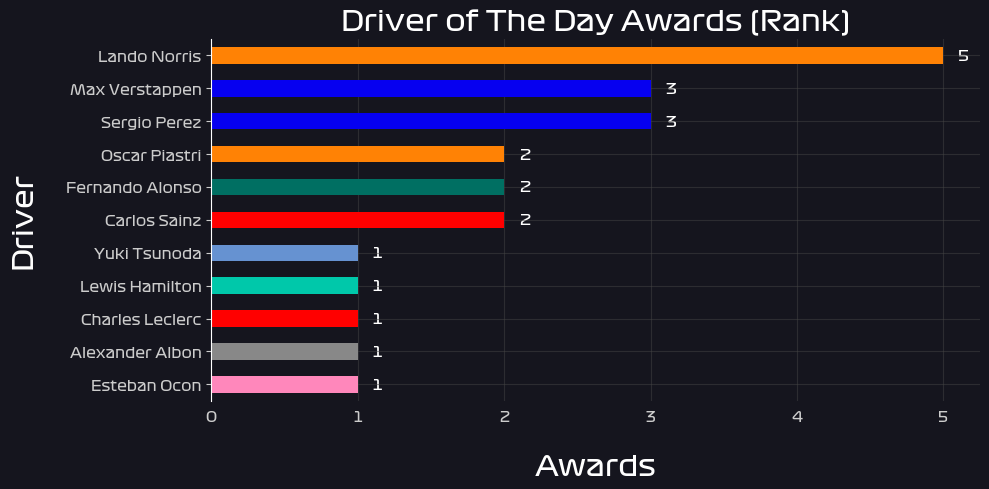

In [60]:
# Rank - Driver of the day Votes
driverOfTheDay_Awards = driverOfTheDay['1st Place'].value_counts()
driverOfTheDay_Awards = driverOfTheDay_Awards.sort_values()

# Data visualization
driverOfTheDay_Awards.plot(
    kind='barh',
    figsize=(10,5),
    zorder = 2,
    color = assign_color_drivers(driverOfTheDay_Awards.index)
)
plt.title('Driver of The Day Awards (Rank)')
plt.xlabel('Awards', fontsize=20, fontweight='bold')
plt.ylabel('Driver', fontsize=20, fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', bottom=False)

for i, (driver, count) in enumerate(zip(driverOfTheDay_Awards.index, driverOfTheDay_Awards.values)):
    plt.text(count + 0.1, i, str(count), va='center', fontweight='bold', fontsize=11, zorder=1)

plt.grid(axis='x', alpha=0.5, zorder=0)
plt.grid(axis='y', alpha=0.5, zorder=0)
plt.tight_layout()
plt.show()

In [61]:
seasonTeams

,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
Team,,,,,,,,,,,
Red Bull Racing,Oracle Red Bull Racing,"Milton Keynes, United Kingdom",Christain Horner,Pierre Waché,RB19,Honda RBPT,1997,6,1(x113),95,95
Mercedes,Mercedes-AMG Petronas F1 Team,"Brackley, United Kingdom",Toto Wolff,James Allison,W14,Mercedes,1970,8,1(x116),129,96
Ferrari,Scuderia Ferrari,"Maranello, Italy",Frédéric Vasseur,Enrico Cardile / Enrico Gualtieri,SF-23,Ferrari,1950,16,1(x244),249,259
McLaren,McLaren Formula 1 Team,"Woking, United Kingdom",Andrea Stella,Peter Prodromou / Neil Houldey,MCL60,Mercedes,1966,8,1(x183),156,165
Aston Martin,Aston Martin Aramco Cognizant F1 Team,"Silverstone, United Kingdom",Mike Krack,Dan Fallows,AMR23,Mercedes,2018,0,1(x1),1,1
Alpine,BWT Alpine F1 Team,"Enstone, United Kingdom",Bruno Famin,Matt Harman,A523,Renault,1986,2,1(x21),20,15
Williams,Williams Racing,"Grove, United Kingdom",James Vowles,Pat Fry,FW45,Mercedes,1978,9,1(x114),128,133
AlphaTauri,Scuderia AlphaTauri,"Faenza, Italy",Franz Tost,Jody Egginton,AT04,Honda RBPT,1985,0,1(x2),1,3
Alfa Romeo,Alfa Romeo F1 Team Stake,"Hinwil, Switzerland",Alessandro Alunni Bravi,James Key,C43,Ferrari,1993,0,1(x1),1,7


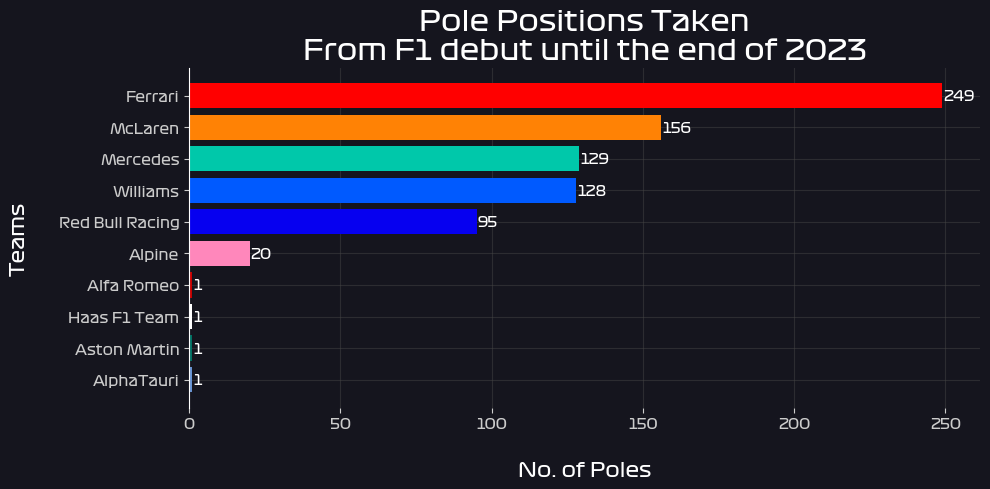

In [62]:
# (Rank) No. of Poles by each team since joining F1
seasonTeams_sorted = seasonTeams.sort_values(by='Pole Positions', ascending=True)

teams = seasonTeams_sorted.index.tolist()
poles = seasonTeams_sorted['Pole Positions'].tolist()
color = assign_color_teams(teams)

# Plotting
plt.figure(figsize=(10,5))
bars = plt.barh(teams, poles, color = color, zorder=2)
plt.title('Pole Positions Taken\nFrom F1 debut until the end of 2023', fontsize=20, fontweight='bold')
plt.ylabel('Teams', fontsize=14, fontweight='bold')
plt.xlabel('No. of Poles', fontsize=14, fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(axis='x', alpha=0.5, zorder=1)
plt.grid(axis='y', alpha=0.5, zorder=1)

for i,(value, team) in enumerate(zip(poles, teams)):
    plt.text(value + 0.3, i, str(value), va='center', ha='left', fontsize=10, color='white')

plt.tight_layout()
plt.show()
